In [1]:
import pandas as pd

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio
import math
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score 

In [4]:
file_paths= [
    '/Users/laurawang/Documents/ClassIn Files/Files/archive/CAvideos.csv',
    '/Users/laurawang/Documents/ClassIn Files/Files/archive/USvideos.csv'
]

In [5]:
dataframes = {} # a dictionary to hold all your dataframes

for path in file_paths:
    #This assumes the name of the dataframe is the prefix of the file
    df_name = path.split('/')[-1].replace('.csv', '')
    dataframes[df_name] = pd.read_csv(path)

In [7]:
#EDA (Exploratory data analysis) for organizing the text structure
df_US = dataframes['USvideos']
df_US.head()




,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
df_US=dataframes['USvideos']
df_US.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


In [9]:
print("Dataset info:")
print(df_US.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  

In [10]:
json_files= [ 
    '/Users/laurawang/Documents/ClassIn Files/Files/archive/US_category_id.json'
]

In [11]:
import pandas as pd

# Path to JSON file
json_file_path_US = '/Users/laurawang/Documents/ClassIn Files/Files/archive 4/US_category_id.json'

# Reading the JSON file into a DataFrame
us_category_json_df_US = pd.read_json(json_file_path_US)

# Extract the 'items' list
items_list_US = us_category_json_df_US['items']

# Create a new DataFrame from 'items' list
# Include only items where 'assignable' is true
category_info_US = [
    {'category_id': item['id'], 'category_title': item['snippet']['title']}
    for item in items_list_US
    if item['snippet']['assignable']
]

categories_df_US = pd.DataFrame(category_info_US)

#Display the first few rows of the new DataFrame
print(categories_df_US)



   category_id         category_title
0            1       Film & Animation
1            2       Autos & Vehicles
2           10                  Music
3           15         Pets & Animals
4           17                 Sports
5           19        Travel & Events
6           20                 Gaming
7           22         People & Blogs
8           23                 Comedy
9           24          Entertainment
10          25        News & Politics
11          26          Howto & Style
12          27              Education
13          28   Science & Technology
14          29  Nonprofits & Activism


In [12]:
df_US.nunique()

video_id                   6280
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [13]:
#Summary statistics: 描述性统计
print("\nSummary statistics:")
df_US.describe().T



Summary statistics:


,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


In [14]:
print("\nMissing values:")
print(df_US.isnull().sum())


Missing values:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [15]:
#数据可视化，category趋势， 分布， 直方图，散点图， 箱形图， 那类视频头流， 那个时间点投留， 各类视频-直方图， 业务方向切合度， views 随着时间推移的变化， viewslikes


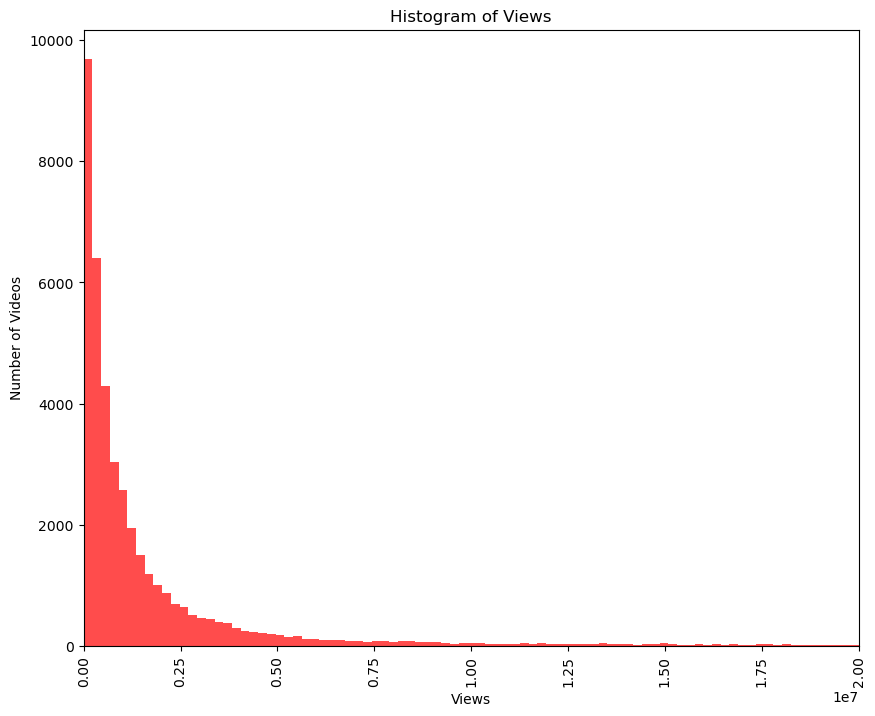

In [16]:
plt.figure(figsize=(10,8))
plt.hist(df_US["views"], bins=1000, color= 'r', alpha= 0.7)
plt.xlabel('Views')
plt.ylabel('Number of Videos')
plt.title('Histogram of views')
plt. title('Histogram of Views')
plt.xlim(0, 2e7) # Adjust the x-axis limits as needed
plt.xticks(rotation=90)
plt.show()


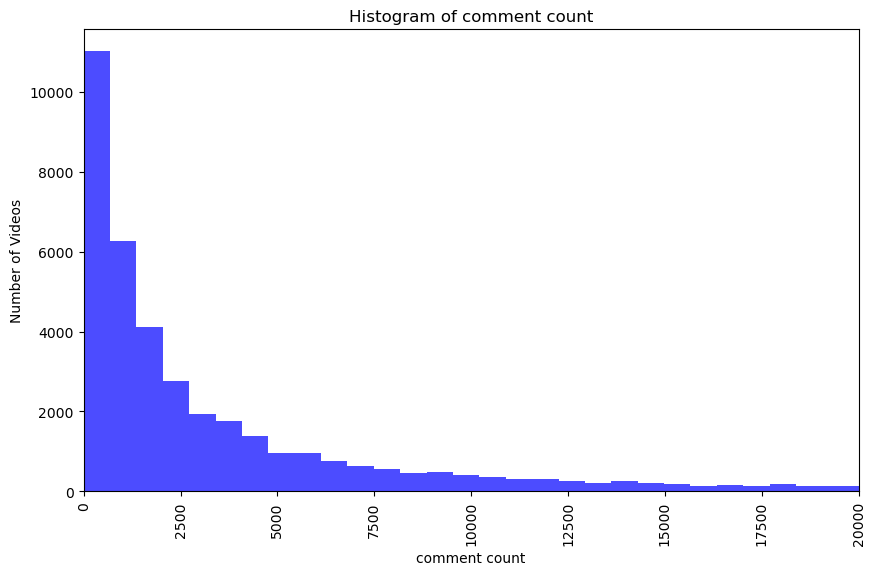

In [17]:
plt. figure(figsize=(10,6))
plt.hist(df_US["comment_count"], bins=2000, color='b', alpha=0.7)
plt.xlabel('comment count')
plt.ylabel('Number of Videos')
plt.title('Histogram of comment count')
plt.xlim(0, 20000)
plt.xticks(rotation=90)
plt.show()
         

In [19]:
grouped = df_US.groupby("video_id")

# Filtering groups based on the condition
wanted_groups = grouped.filter(lambda x: x['title'].nunique() > 1)

# Correcting the variable name in the print statement
print(wanted_groups)



          video_id trending_date  \
44     STI2fI7sKMo      17.14.11   
46     ogYum4kWXgk      17.14.11   
92          #NAME?      17.14.11   
272    ogYum4kWXgk      17.15.11   
309    STI2fI7sKMo      17.15.11   
...            ...           ...   
40745  H7gh2fmdjCU      18.13.06   
40747       #NAME?      18.13.06   
40749       #NAME?      18.14.06   
40774  XQSvN2Wd5MQ      18.14.06   
40858  2nVPFdqejD0      18.14.06   

                                                   title  \
44     AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...   
46     People are Awesome & The Pet Collective presen...   
92                     Animal Adventure Park Giraffe Cam   
272    People Are Awesome & The Pet Collective presen...   
309              WE GOOGLED OURSELVES | Shawn and Andrew   
...                                                  ...   
40745    Calum Scott - What I Miss Most (Official Video)   
40747                                  We Bought A House   
40749                      

<Axes: >

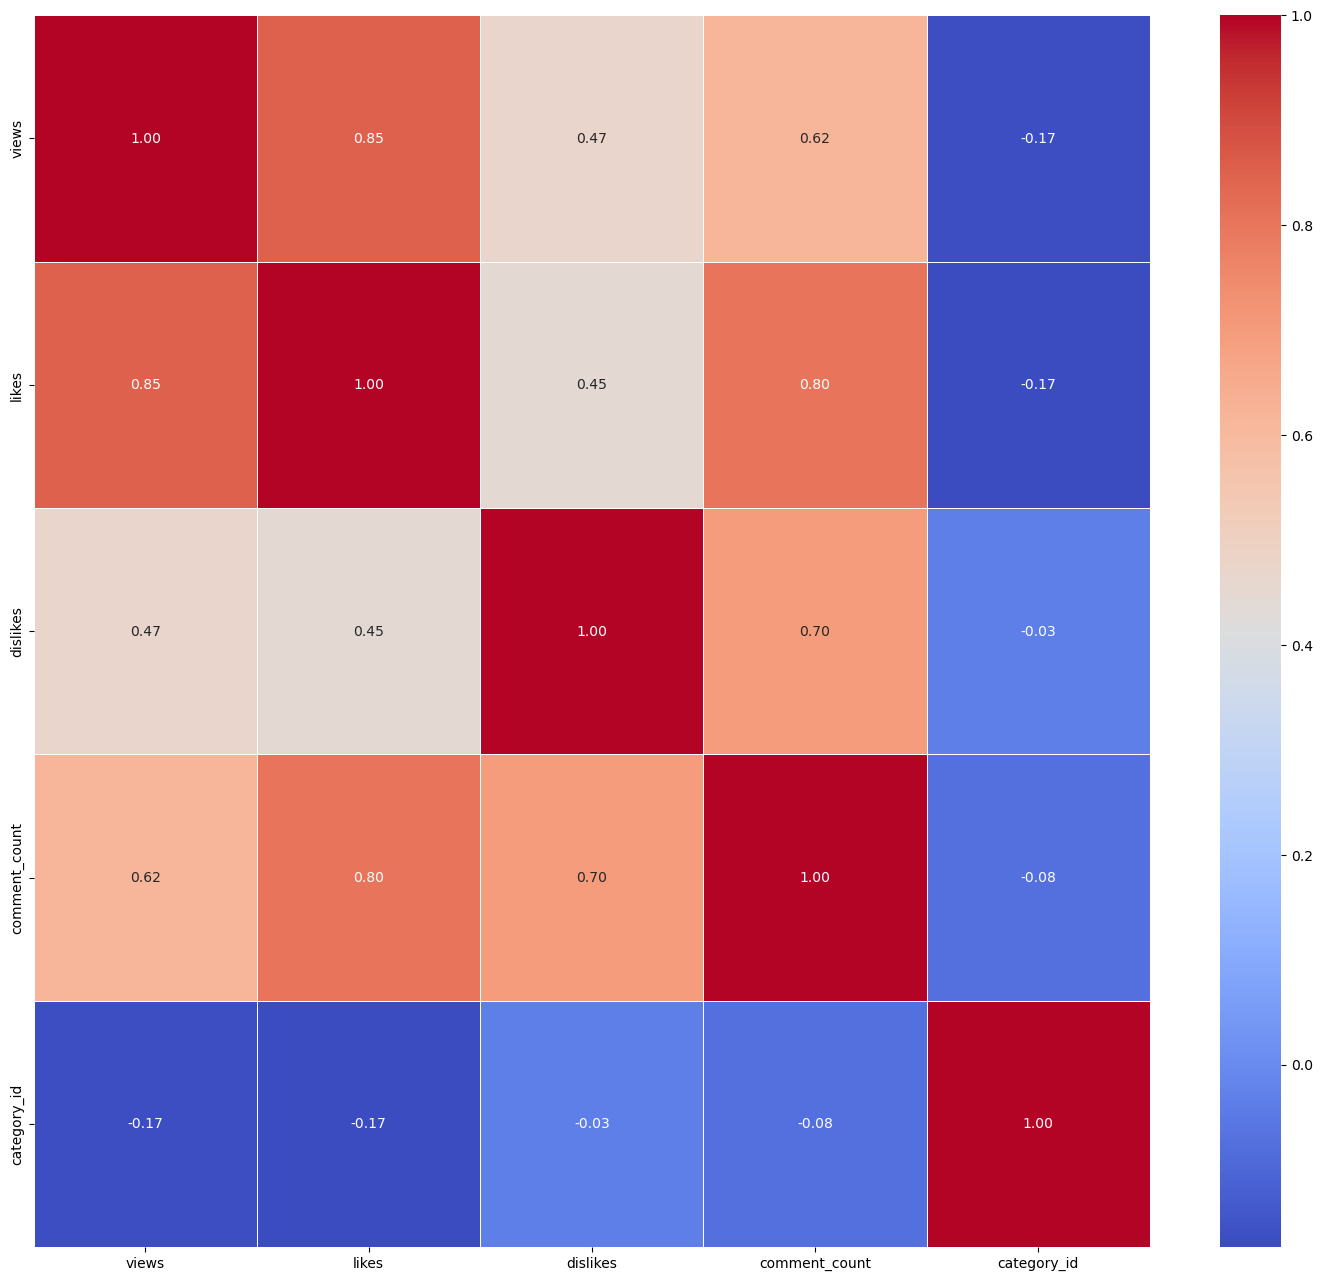

In [22]:
# Select only numeric columns for correlation analysis
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count', 'category_id']
corr_matrix = df_US[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# views and likes are highly correlated with 0.85
# likes and comment count have a high positive correlation 0.80
# between dislikes and comment count correlation is 0.7??


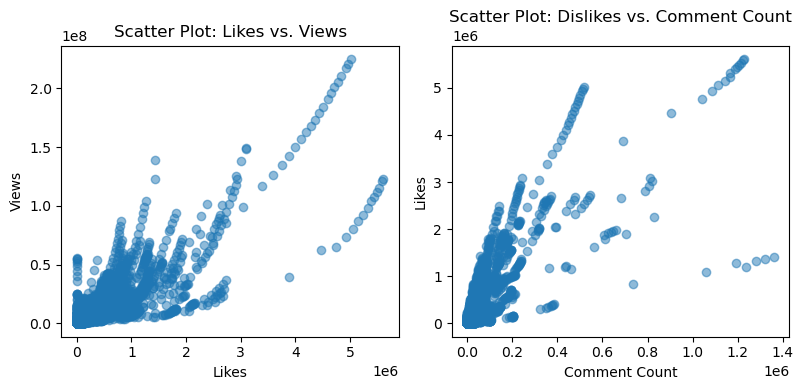

In [24]:
plt.figure(figsize=(12, 4))

# Scatter plot for 'likes' and 'views'
plt.subplot(131)
plt.scatter(df_US['likes'], df_US['views'], alpha=0.5)
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Scatter Plot: Likes vs. Views')

# Scatter plot for 'comment_count' and 'likes'
plt.subplot(132)
plt.scatter(df_US['comment_count'], df_US['likes'], alpha=0.5)
plt.xlabel('Comment Count')  # Corrected label from 'Dislikes'
plt.ylabel('Likes')
plt.title('Scatter Plot: Dislikes vs. Comment Count')  # Corrected title

plt.tight_layout()
plt.show()

           

In [29]:
cdf = df_US.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8.8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")
#channel ESPN has most trending videos, around 200 videos


TypeError: Value after * must be an iterable, not float

In [34]:
#publish time analysis
df_US['publish_time']= pd.to_datetime(df_US['publish_time'])
df_US['year'] = df_US['publish_time'],dt.year
df_US['month'] = df_US['publish_time'].dt.month
df_US['day'] = df_US['publish_time'].dt.day
df_US['hour'] = df_US['publish_time'].dt.hour
df=US['day_of_week'] = df_US['publish_time'].dt.dayofweek
                                            
                                            
video_counts_by_day = df_US.groupby(['day_of_week'])['video_id'].count()
video_counts_by_hour = df.US.groupby(['hour'])['video_id'].count()

NameError: name 'dt' is not defined